# Datasets for testing

* [Teapot dome 3D survey subset](#Teapot-dome-3D-survey-subset)

## Teapot dome 3D survey subset

Dataset consists of 10 raw field records from [Teapot dome 3D survey open dataset](https://wiki.seg.org/wiki/Teapot_dome_3D_survey).

This dataset can be used for testing and demostartion, its size is only 45M.

Below we show sample trace headers and sample seismogram from the dataset.

In [1]:
import sys
sys.path.append('..')

from seismicpro.src import SeismicDataset, FieldIndex

Sample trace headers:

In [2]:
field_index = FieldIndex(name='raw', path='data/npr3_field_10.sgy', extra_headers=['offset'])
field_index.head()

,TraceNumber,offset,TRACE_SEQUENCE_FILE,file_id
,,,raw,raw
FieldRecord,,,,
400,1,12549,1,data/npr3_field_10.sgy
400,2,12379,2,data/npr3_field_10.sgy
400,3,12209,3,data/npr3_field_10.sgy
400,4,12040,4,data/npr3_field_10.sgy
400,5,11874,5,data/npr3_field_10.sgy


Total number of field records and traces:

In [3]:
len(field_index), sum(field_index.tracecounts)

(10, 9069)

Field records sorted by offset

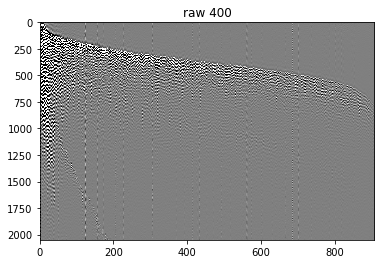

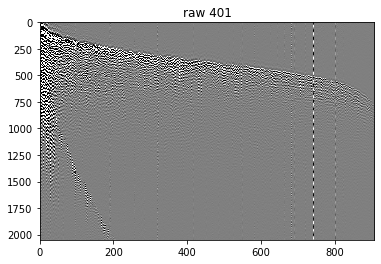

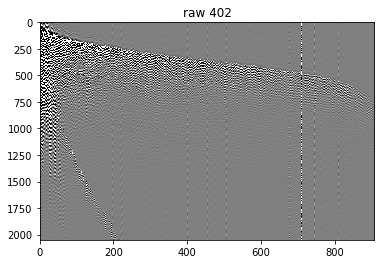

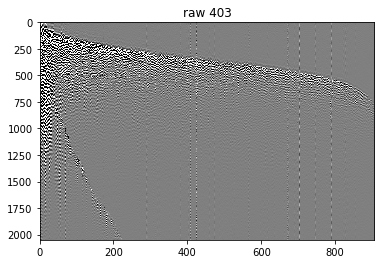

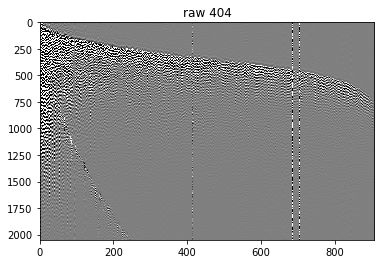

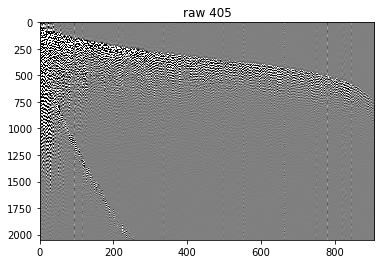

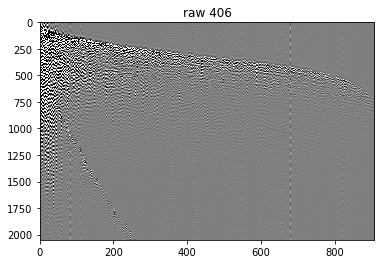

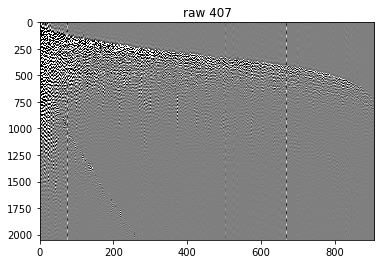

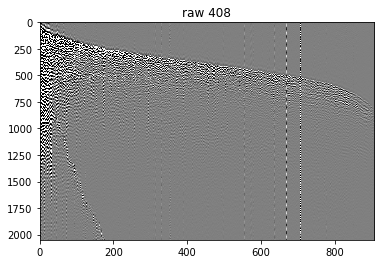

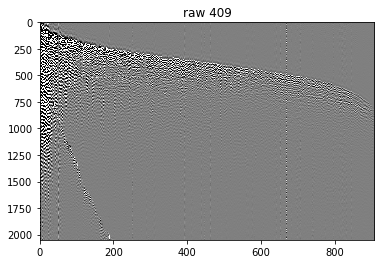

In [4]:
batch = (SeismicDataset(field_index).next_batch(len(field_index))
         .load(fmt='segy', components='raw')
         .sort_traces(src='raw', dst='raw', sort_by='offset'))

cv = 0.0005

for i in range(len(batch)):
    batch.seismic_plot('raw', batch.indices[i], vmin=-cv, vmax=cv, cmap='gray')